## Performing PCA on test data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit


import sys
# sys.path.append("/Users/Work/Developer/interpretDL/interprettensor")
root_logdir = "./tf_logs"

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

tf.__version__

Using TensorFlow backend.


'1.13.1'

In [7]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit

iris = datasets.load_iris()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #x-u/sd
features = scaler.fit_transform(iris["data"])
features[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [12]:
df = pd.DataFrame(features)
df.to_csv("iris.tsv",sep="\t")

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
print("Variance: ", pca.explained_variance_ratio_)
pca.components_

Variance:  [0.72962445 0.22850762]


array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [25]:
X = pca.transform(features)
X[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

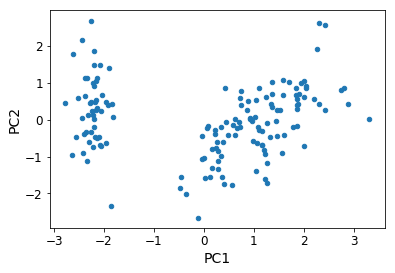

In [29]:
df = pd.DataFrame(X, columns=["PC1","PC2"])
df.plot.scatter(x="PC1", y="PC2")

In [40]:

with tf.Session() as sess:
    x=tf.Variable(features)
    writer = tf.summary.FileWriter(root_logdir)
    summary = tf.summary.tensor_summary("iris_tensor",x)
    tf.global_variables_initializer().run()
    result, = sess.run([summary])
    writer.add_summary(result)
    

In [34]:
summary

<tf.Tensor 'iris_tensor:0' shape=() dtype=string>